In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("/home/imran/Desktop/Data_Analytics/Diwali_Sales_Analysis/Diwali_Sales_Data.csv", encoding="latin1")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df2 = df.drop(['Status', 'unnamed1'], axis = 1) 
df2.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum().sum()

0

In [9]:
df3['Amount'].dtypes

dtype('float64')

In [10]:
df3['Amount'] = df3['Amount'].astype('int')

/tmp/ipykernel_3045/2755090277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Amount'] = df3['Amount'].astype('int')


In [11]:
df3['Amount'].dtypes

dtype('int64')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


### EDA 

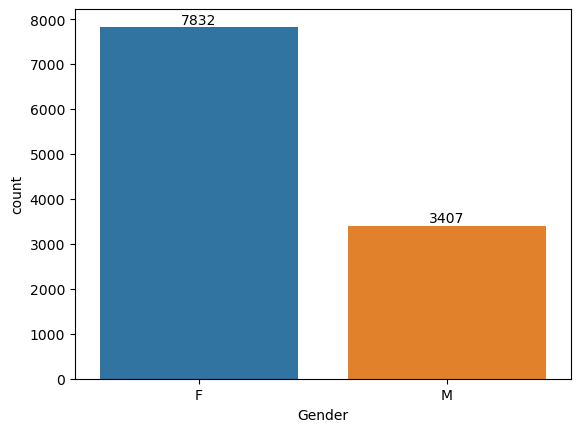

In [13]:
ax = sns.countplot(x = 'Gender', data = df3)
for bars in ax.containers:
    ax.bar_label(bars)

In [14]:
Gen_sales = df3.groupby(['Gender'], as_index= False)['Amount'].sum()
Gen_sales

,Gender,Amount
0,F,74335853
1,M,31913276


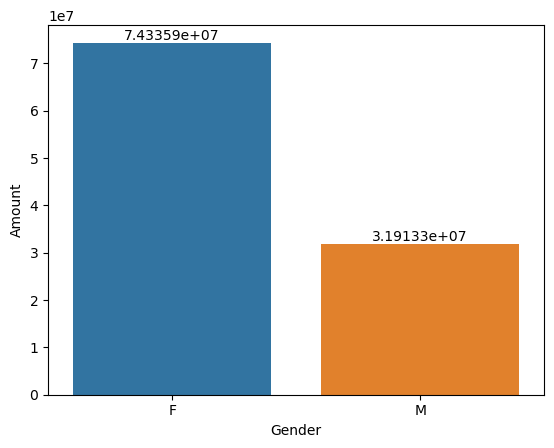

In [15]:
am_plot = sns.barplot(x = 'Gender', y = 'Amount', data = Gen_sales)
for bars in am_plot.containers:
    am_plot.bar_label(bars)

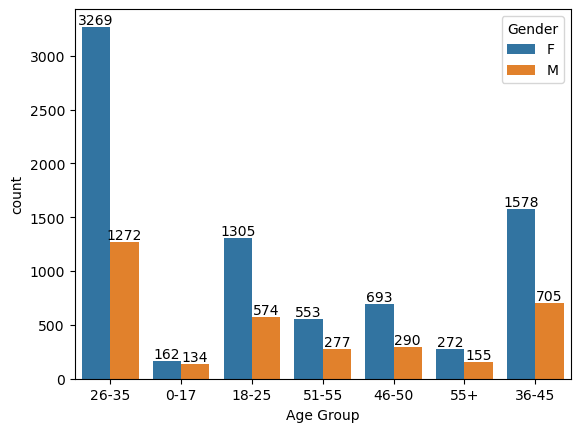

In [16]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df3)
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
Gen_sales = df3.groupby(['Age Group'], as_index= False)['Amount'].sum()
Gen_sales

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


<Axes: xlabel='Age Group', ylabel='Amount'>

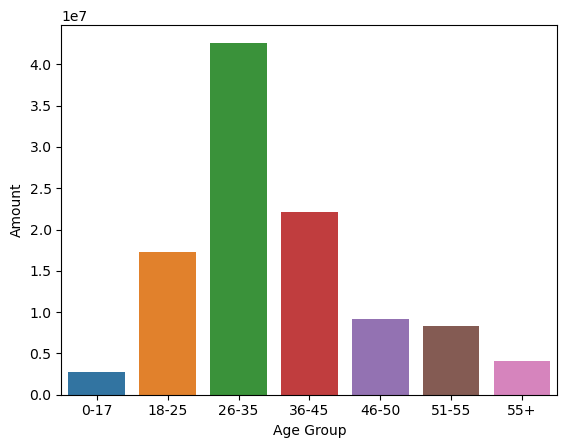

In [18]:
sns.barplot(x = 'Age Group', y = 'Amount', data = Gen_sales)

In [19]:
df3.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
sale_state = df3.groupby(['State'], as_index= False)['Orders'].sum()
sale_state

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1062
2,Delhi,2740
3,Gujarat,1066
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


<Axes: xlabel='State', ylabel='Orders'>

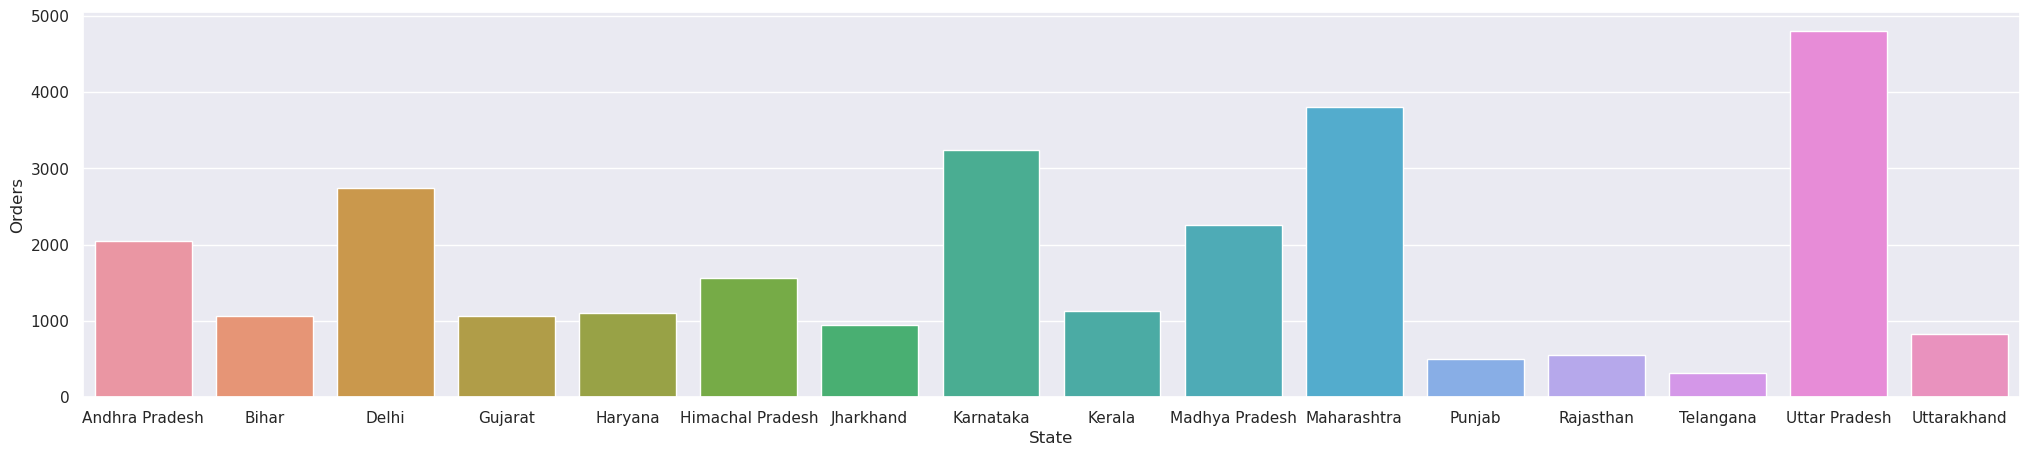

In [21]:
sns.set(rc = {'figure.figsize':(25,5)})
sns.barplot(x = 'State', y = 'Orders', data = sale_state)

In [22]:
sale_state = df3.groupby(['State'], as_index= False)['Amount'].sum()
sale_state

,State,Amount
0,Andhra Pradesh,8037146
1,Bihar,4022757
2,Delhi,11603818
3,Gujarat,3946082
4,Haryana,4220175
5,Himachal Pradesh,4963368
6,Jharkhand,3026456
7,Karnataka,13523540
8,Kerala,3894491
9,Madhya Pradesh,8101142


<Axes: xlabel='State', ylabel='Amount'>

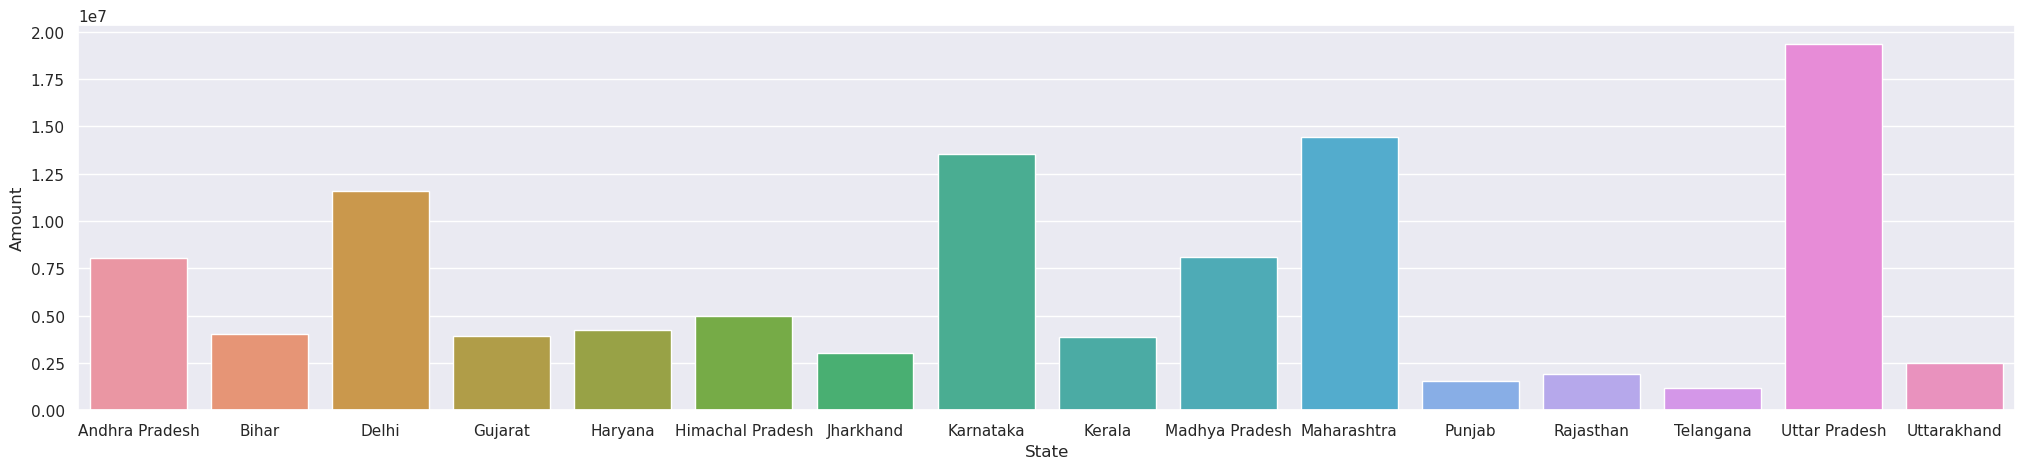

In [23]:
sns.set(rc = {'figure.figsize':(25,5)})
sns.barplot(x = 'State', y = 'Amount', data = sale_state)

In [24]:
df3.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [48]:
Marital_Status_sale = df3.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum()
Marital_Status_sale

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

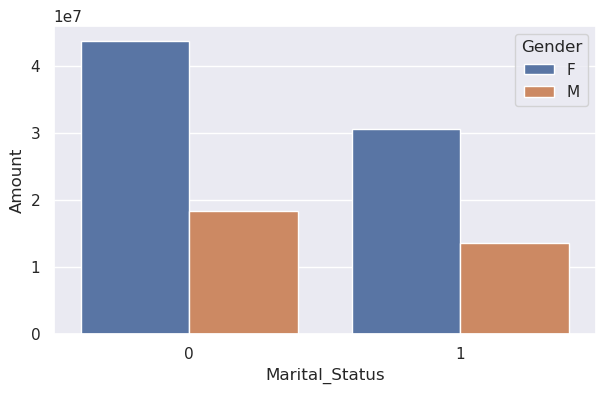

In [52]:
sns.set(rc = {'figure.figsize':(7,4)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = Marital_Status_sale )

<Axes: xlabel='Marital_Status', ylabel='Amount'>

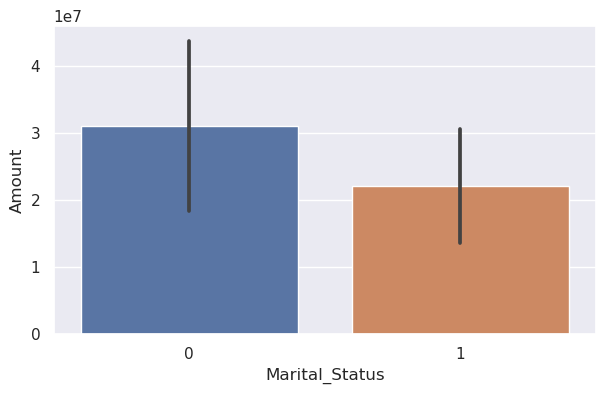

In [53]:
sns.set(rc = {'figure.figsize':(7,4)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = Marital_Status_sale )

### Occupation

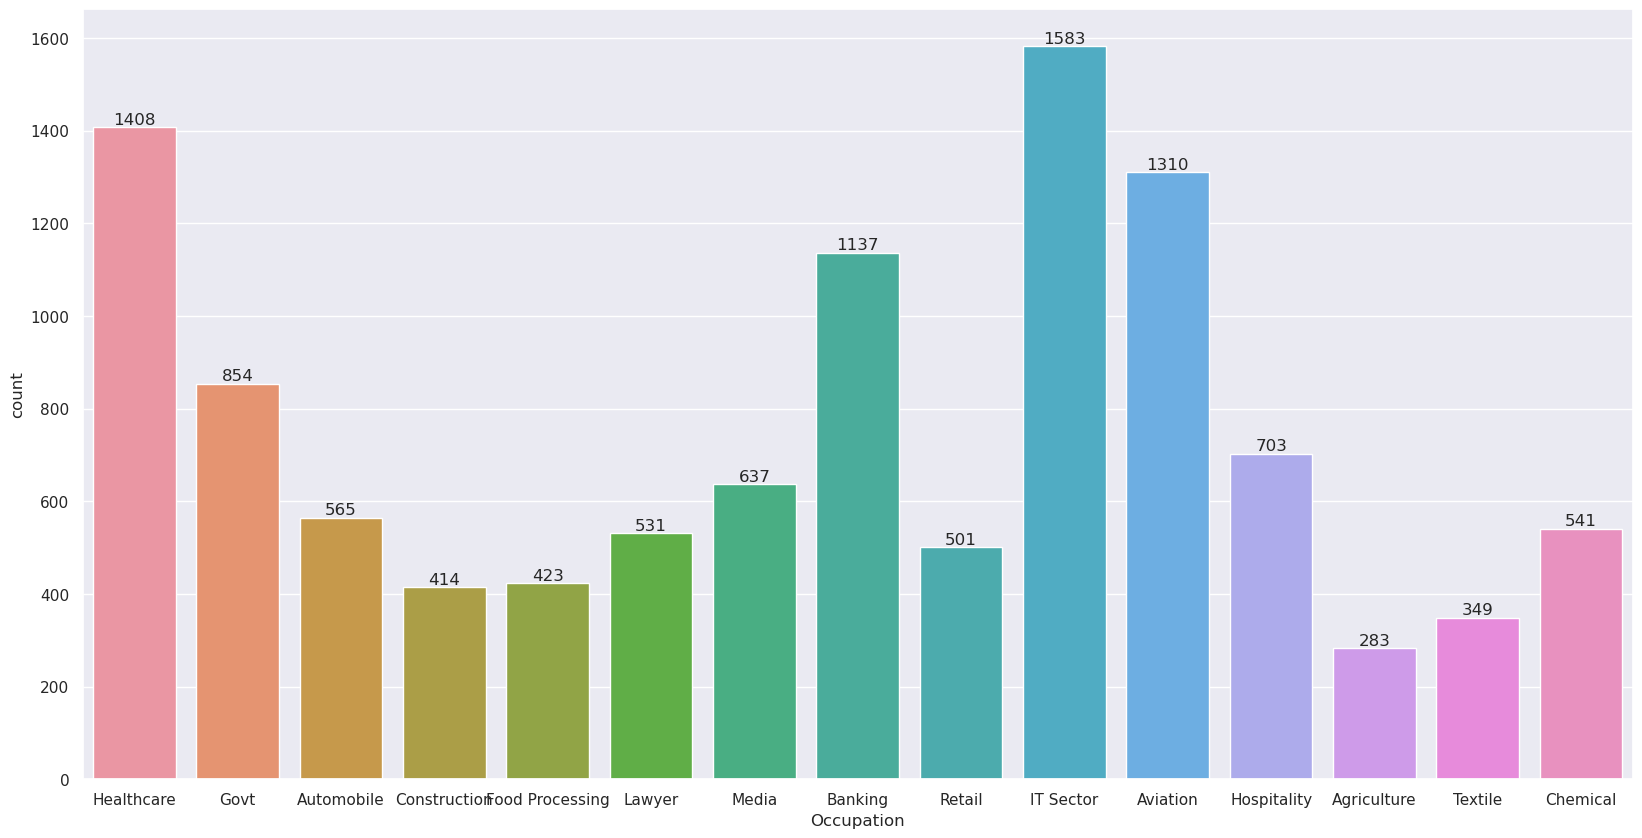

In [63]:
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.countplot(data = df3, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

In [71]:
ocupation_sales = df3.groupby(['Occupation', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
ocupation_sales

,Occupation,Gender,Amount
20,IT Sector,F,10184835
4,Aviation,F,9007393
16,Healthcare,F,8968231
6,Banking,F,7792295
14,Govt,F,6002907
21,IT Sector,M,4570244
24,Media,F,4375029
18,Hospitality,F,4183199
17,Healthcare,M,4066355
2,Automobile,F,3768843


<Axes: xlabel='Occupation', ylabel='Amount'>

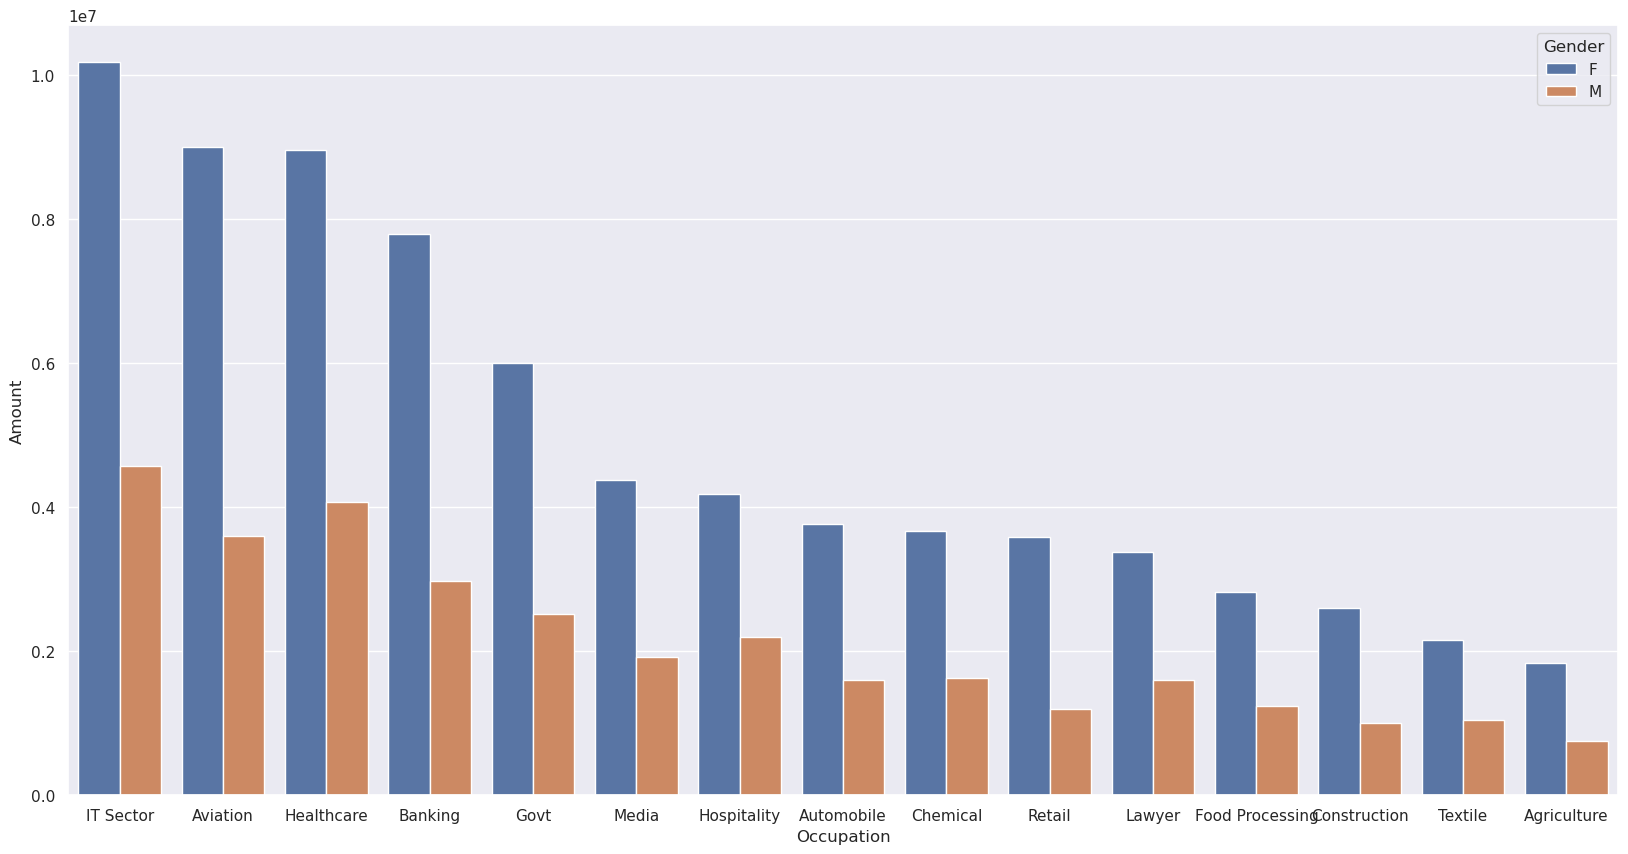

In [73]:
sns.barplot(x = 'Occupation', y = 'Amount', hue = 'Gender', data = ocupation_sales)

### Product_Category

AttributeError: 'Axes' object has no attribute 'head'

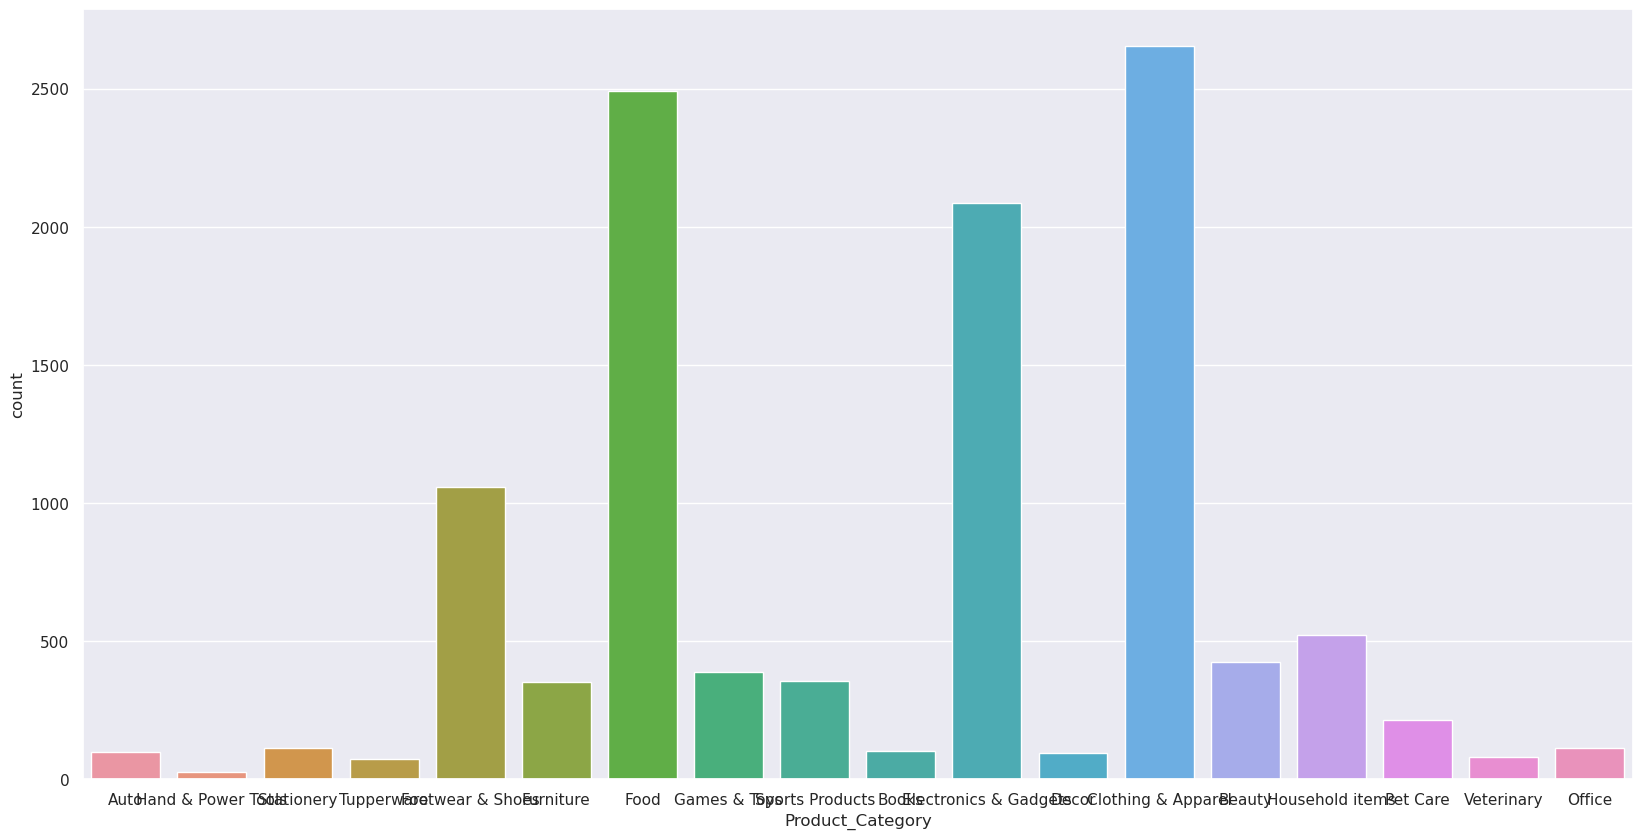

In [97]:
ax = sns.countplot(data = df3, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

In [95]:
product_sales = df3.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)
product_sales

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


<Axes: xlabel='Product_Category', ylabel='Amount'>

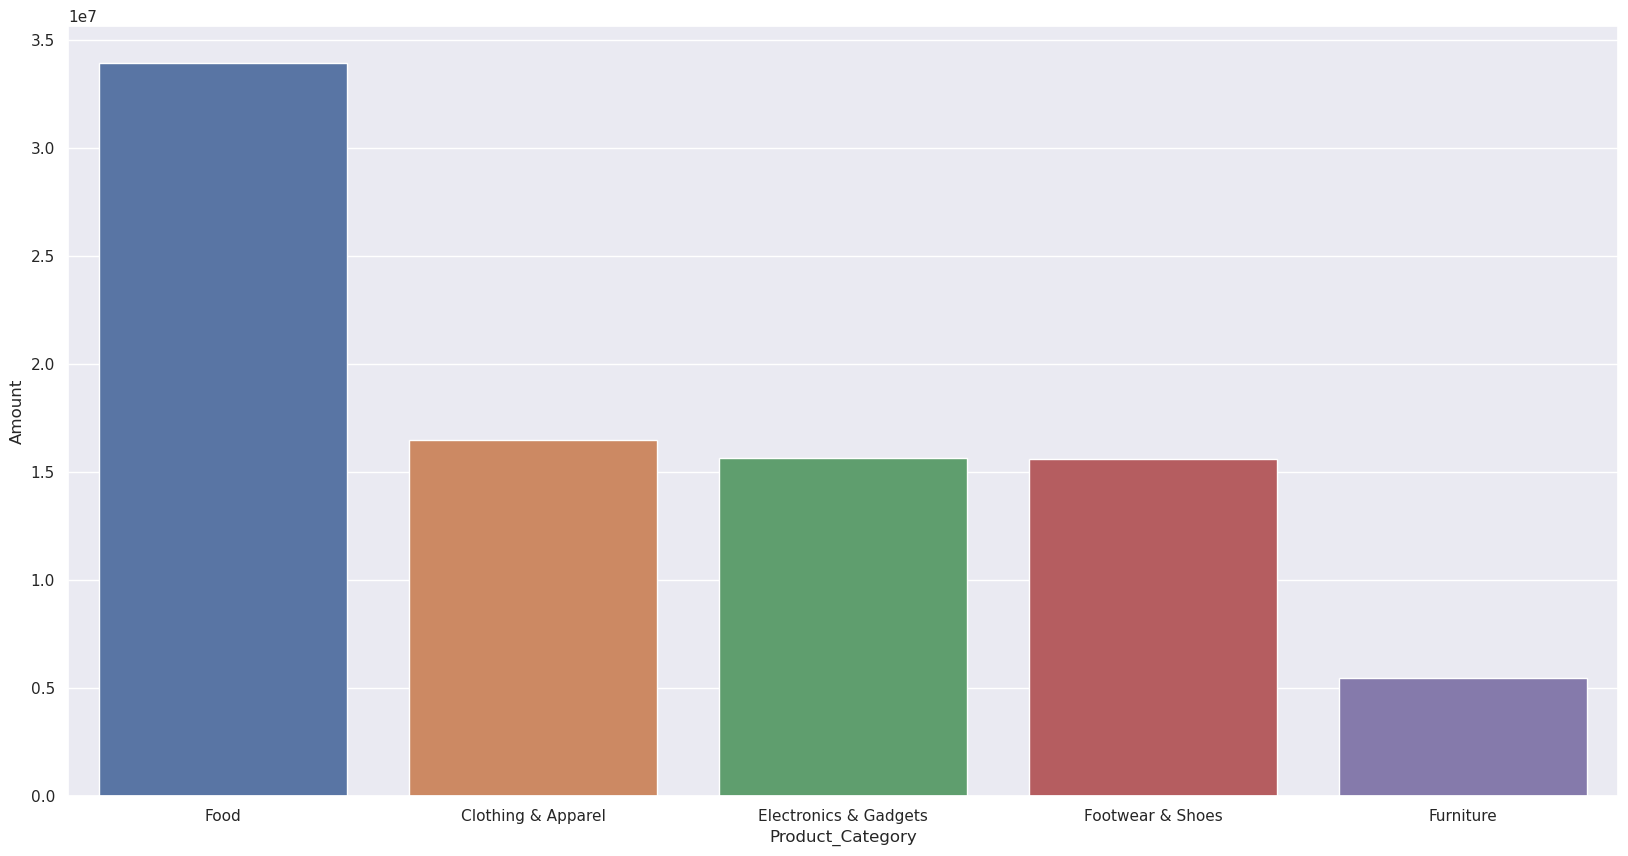

In [96]:
sns.barplot(x = 'Product_Category', y = 'Amount', data = product_sales)